In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install --upgrade tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install tensorflow-text

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import math
import scipy.stats as stats
import nltk
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import zipfile
import os, sys
import requests

from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,confusion_matrix,classification_report

from yellowbrick.cluster import SilhouetteVisualizer

import gensim
from gensim.models import Word2Vec

import tensorflow as tf
import tensorflow_text as tf_text

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
from lib.graphUtils import (
    show_pie,
    show_lines,
    show_pca_variance_graph,
    show_pca_correlation_graph,
    show_scatter_graph,
    show_cols_boxplots_by_col,
    view_clustered_heatmap,
)
pio.renderers.default = "iframe"

import matplotlib.pyplot as plt
import seaborn as sns

working_dir = "working"
if not os.path.isdir(working_dir):
    os.mkdir(working_dir)
    
import tensorflow_hub as hub

2023-05-26 14:44:24.075129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Récupération des données

In [8]:
if not os.path.isdir("assets"):
    os.mkdir("assets")

if not os.path.isfile('assets/data1.zip'):
    url = 'https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip'
    r = requests.get(url, allow_redirects=True)
    open('assets/data1.zip', 'wb').write(r.content)

In [9]:
import zipfile
with zipfile.ZipFile('assets/data1.zip', 'r') as zip_ref:
    zip_ref.extractall('assets')


# Chargement des données dans un Dataframe

In [10]:
df = pd.read_csv("assets/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [11]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [13]:
df.describe(include='all')

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1049.000000,1049.000000,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,NaN,NaN,1050,2,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,NaN,NaN,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,NaN,NaN,1,993,1,889,889,11,22
mean,NaN,NaN,NaN,NaN,NaN,NaN,2186.197331,1584.527169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7639.229411,7475.099680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,555.000000,340.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,999.000000,600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,1199.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ici, nous allons travailler sur les features:
- product_name
- description
- product_category_tree

In [14]:
df["product_category_tree"].unique().shape

(642,)

Nous avons 642 catégories pour 1050 produits. Nous allons retenir le 1er niveau.

In [15]:
all_cats = []
for cat in df["product_category_tree"].unique():
    #print(cat)
    cat = cat.strip()[2:-2]
    cat = cat.split(">>")
    #print(cat)
    all_cats.append(cat[0].strip().lower())
    #print(all_cats)
    #1/0
all_cats = set(all_cats)
print(len(all_cats))

7


In [16]:
all_cats

{'baby care',
 'beauty and personal care',
 'computers',
 'home decor & festive needs',
 'home furnishing',
 'kitchen & dining',
 'watches'}

In [17]:
def get_category_level_0(x):
    c = x["product_category_tree"].strip()[2:-2]
    c = c.split(">>")
    return c[0].strip().lower()

df["category0"] = df.apply(lambda x: get_category_level_0(x), axis=1)

In [18]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category0
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",home furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",baby care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",baby care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",home furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",home furnishing


# Analyse du corpus des descriptions

## Description

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
punkt_folder = "/home/jupyter/nltk_data/tokenizers/punkt"

In [21]:
nltk.download('wordnet')
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jupyter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
tokenizer = nltk.data.load(f'{punkt_folder}/english.pickle')

In [24]:
stop_words = stopwords.words('english')

In [26]:
def add_to_corpus(s, corpus=None, tokenizer=None, lemmatizer=None, stemmer=None, stop_words=[]):
    if tokenizer is None:
        tokenizer = nltk.data.load(f'{punkt_folder}/english.pickle')
        
    if corpus is None:
        corpus = defaultdict(int)
        
    words = [word.lower() for word in nltk.word_tokenize(s)]
    for w in words:
        if lemmatizer is not None:
            w = lemmatizer.lemmatize(w, "v")
        if len(w)>3 and w.isalpha() and w.lower() not in stop_words:
            if stemmer is not None:
                w = stemmer.stem(w)
            if w.lower() not in stop_words:
                corpus[w] += 1
        
    return corpus

In [27]:
corpus_description = None
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

for desc in df["description"]:
    corpus_description = add_to_corpus(desc, corpus=corpus_description, tokenizer=tokenizer, lemmatizer=lemmatizer, stemmer=stemmer, stop_words=stop_words)

In [28]:
nb_shown = 0
for index, (key, value) in enumerate(dict(sorted(corpus_description.items(), key=lambda item: item[1], reverse=True)).items()):
    print(f"{key}: {value}")
    nb_shown += 1
    if nb_shown>100:
        break

product: 868
free: 613
replac: 570
ship: 569
deliveri: 567
genuin: 564
cash: 564
price: 558
guarante: 473
featur: 408
onlin: 396
design: 395
specif: 379
color: 369
watch: 360
pack: 341
make: 338
type: 324
babi: 321
materi: 310
cotton: 296
gener: 292
print: 290
packag: 275
sale: 262
analog: 255
number: 250
warranti: 249
brand: 247
detail: 246
qualiti: 243
girl: 242
laptop: 234
best: 230
inch: 227
model: 220
gift: 220
ceram: 217
fabric: 210
showpiec: 207
cover: 205
size: 196
perfect: 190
great: 189
india: 180
dimens: 175
skin: 170
home: 169
ideal: 167
multicolor: 160
content: 157
light: 154
beauti: 152
combo: 148
power: 144
water: 142
women: 139
discount: 134
love: 134
adapt: 131
width: 129
give: 128
black: 127
also: 126
batteri: 125
comfort: 124
care: 122
wash: 122
pattern: 118
coffe: 116
style: 115
height: 114
blue: 113
high: 110
look: 109
shape: 109
name: 107
length: 107
towel: 106
dress: 105
come: 104
round: 104
weight: 102
easi: 102
wall: 102
bodi: 101
decor: 101
craft: 98
addit: 96

In [29]:
len(corpus_description)

3436

On voit certains mots qui ont des fréquences très élevées mais qui n'ont pas d'interet, exemples: product, free, discount

Nous allons ajouter ces mots au tableau stop_words

In [30]:
stop_words2 = []
for index, (key, value) in enumerate(corpus_description.items()):
    if value>=243 and key!="cotton" and key!="babi" and key!="watch" and key!="analog":
        stop_words2.append(key)
stop_words2 += ["also", "look", "make", "use", "height", "width", "size", "brand", "inch", "model", "name", "discount", "perfect", "made", "gift", "ideal", "code"]


In [31]:
stop_words2

['featur',
 'pack',
 'price',
 'make',
 'qualiti',
 'design',
 'print',
 'specif',
 'gener',
 'brand',
 'type',
 'color',
 'number',
 'sale',
 'packag',
 'materi',
 'product',
 'warranti',
 'onlin',
 'genuin',
 'replac',
 'guarante',
 'free',
 'ship',
 'cash',
 'deliveri',
 'detail',
 'also',
 'look',
 'make',
 'use',
 'height',
 'width',
 'size',
 'brand',
 'inch',
 'model',
 'name',
 'discount',
 'perfect',
 'made',
 'gift',
 'ideal',
 'code']

In [32]:
corpus_description = None
stop_words2 = stop_words+stop_words2
for desc in df["description"]:
    corpus_description = add_to_corpus(desc, corpus=corpus_description, tokenizer=tokenizer, lemmatizer=lemmatizer, stemmer=stemmer, stop_words=stop_words2)

In [33]:
nb_words = []
txt_words = []
for index, (key, value) in enumerate(dict(sorted(corpus_description.items(), key=lambda item: item[1], reverse=True)).items()):
    if index<=20:
        print(f"{key}: {value}")
    nb_words.append(value)
    txt_words.append(key)

watch: 360
babi: 321
cotton: 296
analog: 255
girl: 242
laptop: 234
best: 230
ceram: 217
fabric: 210
showpiec: 207
cover: 205
great: 189
india: 180
dimens: 175
skin: 170
home: 169
multicolor: 160
content: 157
light: 154
beauti: 152
combo: 148


In [34]:
fig = go.Figure(data=go.Scatter(x=list(range(0, len(nb_words))),
                                y=nb_words,
                                mode='markers',
                                text=txt_words)) # hover text goes here

fig.update_layout(title='Mots utilisés dans les descriptions')
fig.show()

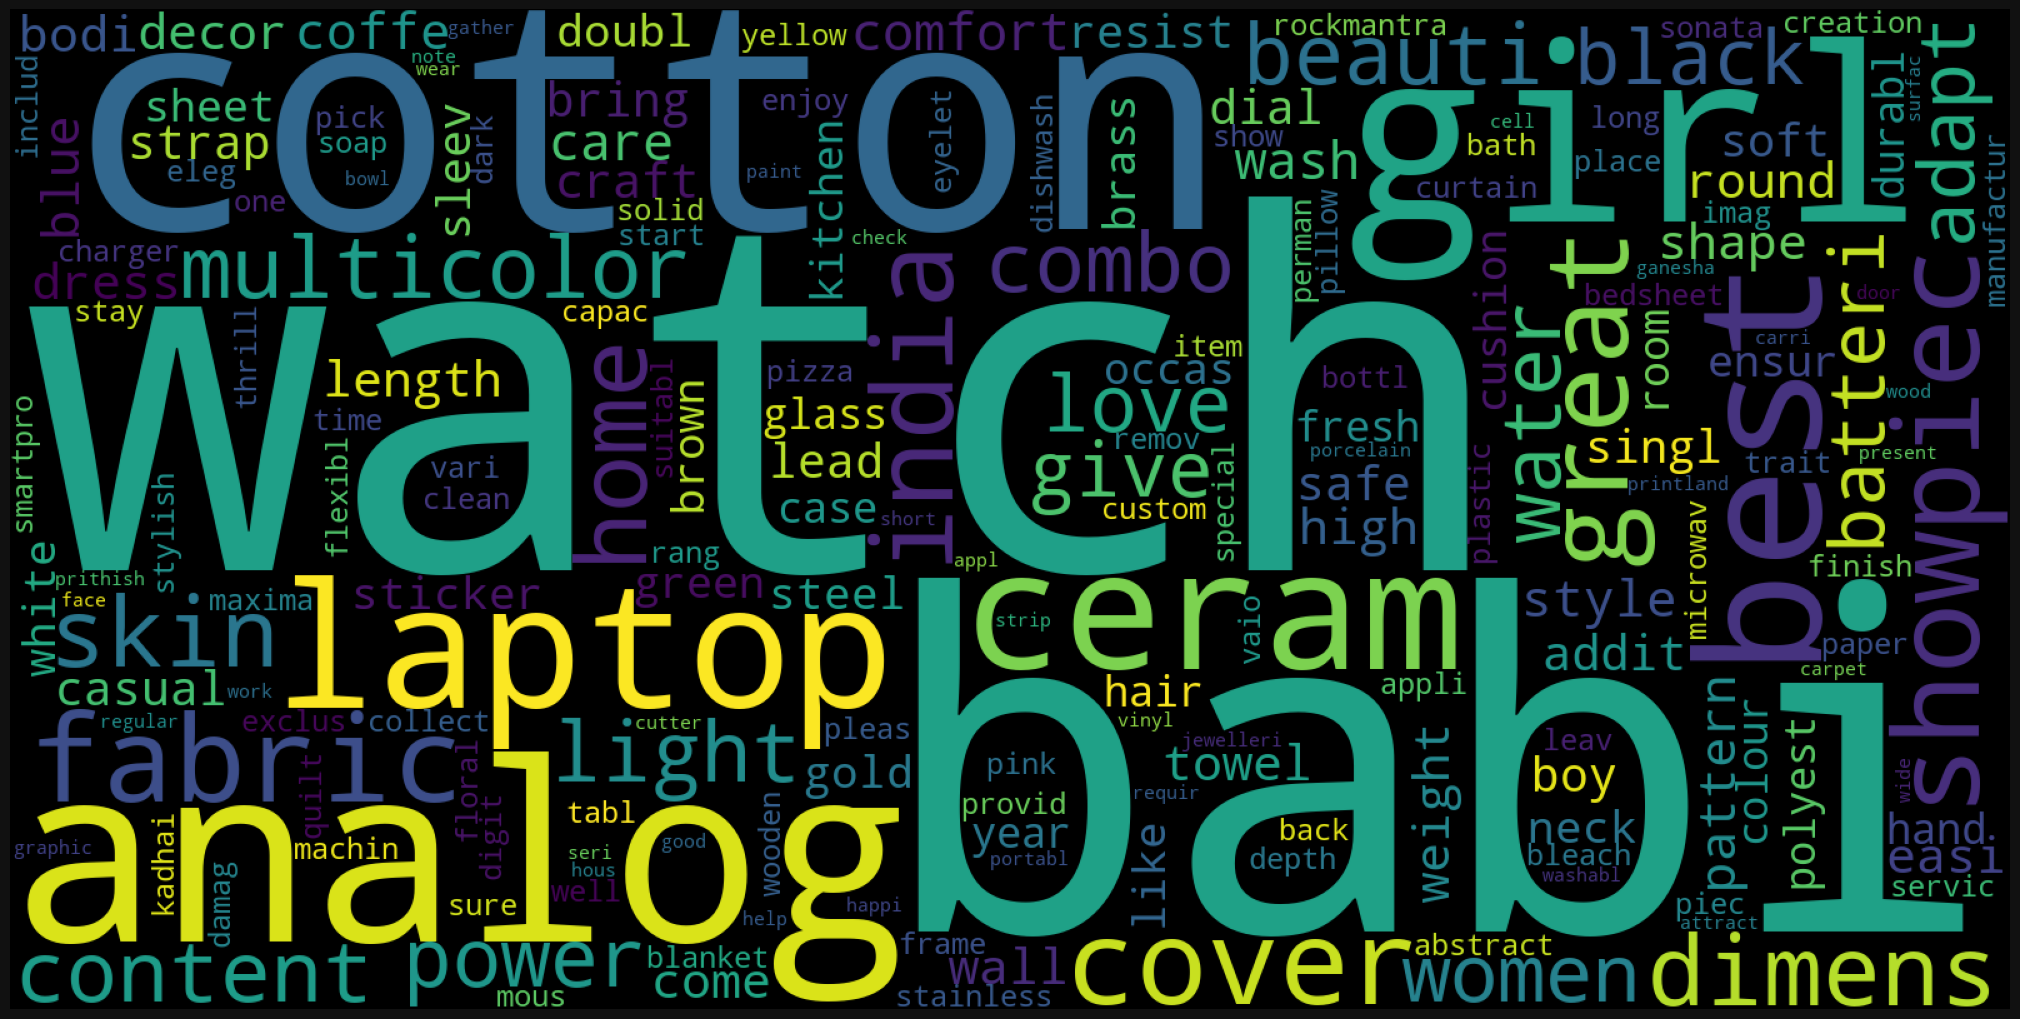

In [35]:
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(corpus_description)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



## product_name

In [36]:
corpus_title = None
for desc in df["product_name"]:
    corpus_title = add_to_corpus(desc, corpus=corpus_title, tokenizer=tokenizer, lemmatizer=lemmatizer, stemmer=stemmer, stop_words=stop_words2)

In [37]:
nb_words = []
txt_words = []
for index, (key, value) in enumerate(dict(sorted(corpus_title.items(), key=lambda item: item[1], reverse=True)).items()):
    if index<=20:
        print(f"{key}: {value}")
    nb_words.append(value)
    txt_words.append(key)

watch: 151
analog: 127
showpiec: 105
babi: 94
combo: 93
ceram: 78
girl: 71
cotton: 55
women: 55
singl: 45
doubl: 40
abstract: 39
laptop: 39
boy: 35
light: 33
blue: 32
towel: 31
lead: 31
multicolor: 29
comfort: 29
floral: 27


In [38]:
fig = go.Figure(data=go.Scatter(x=list(range(0, len(nb_words))),
                                y=nb_words,
                                mode='markers',
                                text=txt_words)) # hover text goes here

fig.update_layout(title='Mots utilisés dans les noms de produits')
fig.show()

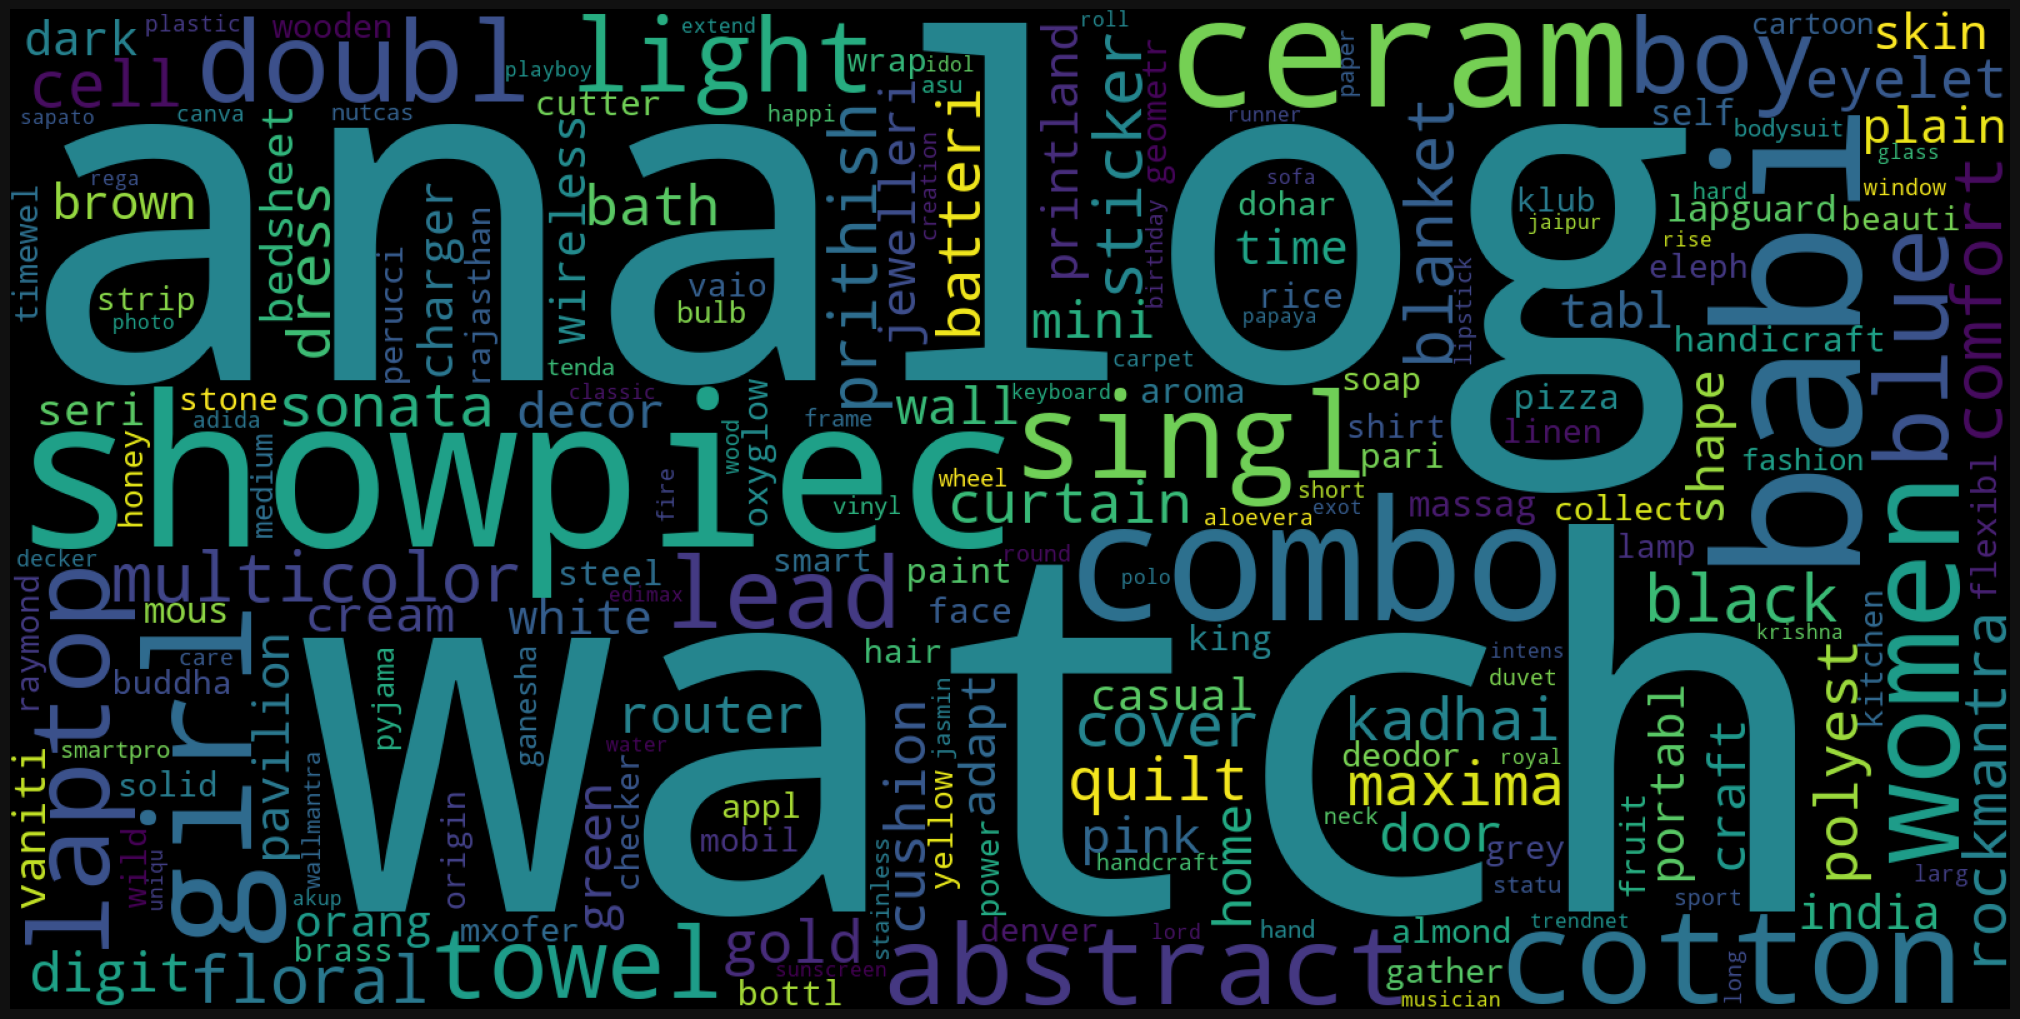

In [39]:
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(corpus_title)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Nettoyage des corpus

On constate que la marque du produit peut se retrouver dans product_name ou description.

In [40]:
def clean_text(x, col, tokenizer=None, lemmatizer=None, stemmer=None, stop_words=[]):
    s = x[col].lower()
    if not pd.isna(x["brand"]):
        s = s.replace(x["brand"].lower(), "")
    
    if tokenizer is None:
        tokenizer = nltk.data.load(f'{punkt_folder}/english.pickle')
                
    r = []
    words = [word.lower() for word in nltk.word_tokenize(s)]
    for w in words:
        if lemmatizer is not None:
            w = lemmatizer.lemmatize(w)
        if len(w)>3 and w.isalpha() and w.lower() not in stop_words:
            if stemmer is not None:
                w = stemmer.stem(w)
            if w.lower() not in stop_words:
                r.append(w)
    return " ".join(r)

df["cleaned_product_name"] = df.apply(lambda x: clean_text(x, "product_name", tokenizer, lemmatizer, stemmer, stop_words2), axis=1)

In [41]:
df.loc[:, ["product_name", "cleaned_product_name"]].tail(20)

,product_name,cleaned_product_name
1030,OMRD RD6697 Hot and cold Pack,cold
1031,Kerastase Nutritive Bain Satin 1 Complete Nutr...,nutrit bain satin complet nutrit shampoo
1032,PRINT SHAPES mary and max cartoon Laptop Skin ...,mari cartoon laptop skin mous combo
1033,Aroma Comfort Polyester Dark Blue Plain Eyelet...,polyest dark blue plain eyelet window curtain
1034,PRINT SHAPES Peacock Feather Laptop Skin with ...,peacock feather laptop skin mous combo
1035,PRINT SHAPES despicable me 2 looking upwards L...,despic upward laptop skin mous combo
1036,PRINT SHAPES Red bull Laptop Skin with Mouse p...,bull laptop skin mous combo
1037,Aroma Comfort Polyester Brown Self Design Eyel...,polyest brown self eyelet door curtain
1038,"Surgical e Sstudio S0004 Gown, Pant Hospital S...",gown pant hospit scrub
1039,Reiki Crystal Products Showpiece - 6 cm,showpiec


## description

In [42]:
df["cleaned_description"] = df.apply(lambda x: clean_text(x, "description", tokenizer, lemmatizer, stemmer, stop_words2), axis=1)

In [43]:
df.loc[:, ["description", "cleaned_description"]]

,description,cleaned_description
0,Key Features of Elegance Polyester Multicolor ...,polyest multicolor abstract eyelet door curtai...
1,Specifications of Sathiyas Cotton Bath Towel (...,cotton bath towel bath towel yellow blue bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,cotton terri face towel small cotton terri fac...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,cotton king doubl bedsheet royal bedsheet perf...
4,Key Features of Jaipur Print Cotton Floral Kin...,cotton floral king doubl bedsheet cotton cotto...
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,extra larg self adhes sticker doubl sticker wa...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,larg vinyl sticker sticker bring home exclus p...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,extra larg pigment polyvinyl film import stick...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,medium vinyl sticker sticker medium vinyl stic...


## Enregistrement

In [44]:
df.to_parquet(f"{working_dir}/cleaned.parquet")

In [45]:
df_experiments = pd.DataFrame({
    'algorithm': pd.Series(dtype='str'),
    'used_text': pd.Series(dtype='str'),
    'projection': pd.Series(dtype='str'),
    'silhouette': pd.Series(dtype='float')
})

In [46]:
def log_experiment(df_experiments, algo, used_text, projection, XX, ref_category):
    score = silhouette_score(XX, ref_category)
    df_experiments = pd.concat(
        [
            df_experiments,
            pd.DataFrame(
                [{
                    "algorithm": algo,
                    "used_text": used_text,
                    "projection": projection,
                    "silhouette": score,
                }]
            )
        ],
        ignore_index=True,
    )
    print(f"Silhouette score = {score}")
    return df_experiments

# Création d'un bag of words avec CountVectorizer

## Expérience 1
Ici, nous concaténons cleaned_product_name et cleaned_description et faisons une décomposition sur cette nouvelle colonne (fit et transform)

In [47]:
df = pd.read_parquet(f"{working_dir}/cleaned.parquet")
df["cleaned_text"] = df["cleaned_product_name"].astype(str) + " " + df["cleaned_description"].astype(str)

In [48]:
vectorizer_product_name_description= CountVectorizer()
X = vectorizer_product_name_description.fit_transform(df["cleaned_text"]).toarray()

In [49]:
vectorizer_product_name_description.get_feature_names_out()

array(['aari', 'abil', 'abl', ..., 'zone', 'zoom', 'zora'], dtype=object)

In [50]:
X.shape

(1050, 3076)

In [51]:
scaler = MinMaxScaler()
#X = scaler.fit_transform(df.loc[:, num_cols])
X = scaler.fit_transform(X)

In [52]:
algo="CountVectorizer"

In [53]:
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "None", X, df["category0"])

Silhouette score = -0.07123464396195678


### Projection PCA

In [54]:
pca = PCA(n_components=1000)
pca.fit(X)

PCA(n_components=1000)

In [55]:
show_pca_variance_graph(pca)

Nous allons garder les 623 premières composantes de la PCA, ce qui représente une variance totale à 99% de la variance totale

In [56]:
pca = PCA(n_components=623)

pca.fit(X)
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA - 623", X_pca, df["category0"])

Silhouette score = -0.07194315451365305


In [57]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [58]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

In [59]:
show_scatter_graph(
    x=X_pca[:,4],
    y=X_pca[:,5],
    colors=df["category0"],
    title="Projection PCA sur les axes 4 et 5",
)

### Projection LDA

In [60]:
lda = LatentDirichletAllocation(n_components=7, n_jobs=-1, random_state=0)
X_lda = lda.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "LDA", X_lda, df["category0"])

Silhouette score = -0.0046006880523141785


In [61]:
terms = vectorizer_product_name_description.get_feature_names_out()

lda_components=lda.components_
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)


Topic 0:  ['summari', 'ensur', 'exclus', 'year', 'fresh', 'microwav', 'dishwash']
Topic 1:  ['lowest', 'denver', 'combo', 'content', 'pavilion', 'sticker', 'vinyl']
Topic 2:  ['enjoy', 'coffe', 'prithish', 'bring', 'abstract', 'love', 'fantast']
Topic 3:  ['best', 'timewel', 'soft', 'moment', 'apparel', 'vari', 'cloth']
Topic 4:  ['analog', 'india', 'great', 'woman', 'clasp', 'watch', 'buckl']
Topic 5:  ['showpiec', 'best', 'perform', 'portabl', 'authent', 'stone', 'highest']
Topic 6:  ['content', 'fabric', 'pattern', 'babi', 'length', 'addit', 'girl']


### Projection tSNE

In [62]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.031903285533189774


In [63]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Projection tSNE de X sur les 2 premiers axes"
)

In [64]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA-623+ tSNE", X_embedded, df["category0"])

Silhouette score = 0.057413991540670395


In [65]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Projection tSNE de X_pca sur les 2 premiers axes"
)

In [66]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_lda)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "LDA + tSNE", X_embedded, df["category0"])

Silhouette score = -0.0461549311876297


In [67]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_lda sur les 2 premiers axes"
)

## Expérience 2

Dans ce cas, nous concatenons cleaned_product_name et cleaned_description et faisons une décomposition sur cette nouvelle colonne (transform) après avoir fait le fit sur cleaned_product_name

In [68]:
df = pd.read_parquet(f"{working_dir}/cleaned.parquet")

In [69]:
df["cleaned_text"] = df["cleaned_product_name"].astype(str) + " " + df["cleaned_description"].astype(str)
vectorizer_product_name = CountVectorizer()
vectorizer_product_name.fit(df["cleaned_product_name"])
X = vectorizer_product_name.transform(df["cleaned_text"])

In [70]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X.toarray())
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "None", X, df["category0"])

Silhouette score = -0.06013716801126762


### Projection PCA

In [71]:
pca = PCA(n_components=1000)
pca.fit(X)

PCA(n_components=1000)

In [72]:
show_pca_variance_graph(pca)

Nous allons garder les 590 premières composantes de la PCA, ce qui représente une variance totale à 99% de la variance totale

In [73]:
pca = PCA(n_components=590)
pca.fit(X)
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "PCA - 590", X_pca, df["category0"])

Silhouette score = -0.06089375210421531


In [74]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)


In [75]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

In [76]:
show_scatter_graph(
    x=X_pca[:,4],
    y=X_pca[:,5],
    colors=df["category0"],
    title="Projection PCA sur les axes 4 et 5",
)

### Projection LDA

In [77]:
lda = LatentDirichletAllocation(n_components=7, n_jobs=-1, random_state=0)
X_lda = lda.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "LDA", X_lda, df["category0"])

Silhouette score = 0.0023717369910952408


In [78]:
terms = vectorizer_product_name.get_feature_names_out()

lda_components=lda.components_
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:20]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)


Topic 0:  ['polyest', 'door', 'eyelet', 'portabl', 'digit', 'curtain', 'denver', 'light', 'sport', 'oxyglow', 'brown', 'long', 'appl', 'best', 'shape', 'window', 'cream', 'fruit', 'night', 'massag']
Topic 1:  ['power', 'charger', 'area', 'light', 'best', 'adapt', 'custom', 'batteri', 'kadhai', 'seri', 'bath', 'soft', 'bodi', 'gather', 'rice', 'cell', 'year', 'laptop', 'pavilion', 'protect']
Topic 2:  ['babi', 'girl', 'wash', 'cotton', 'dress', 'neck', 'router', 'casual', 'printland', 'coffe', 'wireless', 'care', 'stylish', 'serv', 'solid', 'timewel', 'combo', 'round', 'love', 'pink']
Topic 3:  ['vaniti', 'pari', 'best', 'showpiec', 'andr', 'anna', 'mini', 'combo', 'steel', 'pyjama', 'dark', 'beauti', 'sunscreen', 'tradit', 'indian', 'natur', 'hookah', 'makeup', 'piec', 'valentin']
Topic 4:  ['fresh', 'year', 'ceram', 'love', 'prithish', 'rockmantra', 'give', 'best', 'safe', 'coffe', 'start', 'showpiec', 'cute', 'share', 'express', 'happi', 'show', 'attract', 'craft', 'mxofer']
Topic 5:

### Projection tSNE

In [79]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.04478485882282257


In [80]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X sur les 2 premiers axes"
)

In [81]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "PCA-590 + tSNE", X_embedded, df["category0"])

show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

Silhouette score = 0.04431743174791336


In [82]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_lda)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "LDA + tSNE", X_embedded, df["category0"])

show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_lda sur les 2 premiers axes"
)

Silhouette score = -0.04569461569190025


## Expérience 3
Ici, nous n'allons prendre que la feature product_name

In [83]:
df = pd.read_parquet(f"{working_dir}/cleaned.parquet")
vectorizer_product_name = CountVectorizer()
X = vectorizer_product_name.fit_transform(df["cleaned_product_name"])

In [84]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X.toarray())
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "None", X, df["category0"])

Silhouette score = 0.024018783783203206


### Projection PCA

In [85]:
pca = PCA(n_components=1000)
pca.fit(X)

PCA(n_components=1000)

In [86]:
show_pca_variance_graph(pca)

In [87]:
pca = PCA(n_components=560)
pca.fit(X)
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "PCA-560", X_pca, df["category0"])


Silhouette score = 0.024790412205591184


In [88]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [89]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

### Projection LDA

In [90]:
lda = LatentDirichletAllocation(n_components=7, n_jobs=-1, random_state=0)
X_lda = lda.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "LDA", X_lda, df["category0"])

Silhouette score = -0.003718140065493649


In [91]:
terms = vectorizer_product_name.get_feature_names_out()

lda_components=lda.components_
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:20]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)


Topic 0:  ['laptop', 'batteri', 'polyest', 'curtain', 'eyelet', 'cushion', 'showpiec', 'digit', 'cover', 'door', 'ceram', 'printland', 'pavilion', 'cell', 'charger', 'adapt', 'seri', 'self', 'oxyglow', 'fruit']
Topic 1:  ['cotton', 'dress', 'babi', 'kadhai', 'bath', 'girl', 'towel', 'sticker', 'blue', 'white', 'gather', 'orang', 'bottl', 'kitchen', 'vinyl', 'bulb', 'bodysuit', 'wrap', 'nutcas', 'larg']
Topic 2:  ['blue', 'grey', 'timewel', 'black', 'combo', 'showpiec', 'babi', 'dohar', 'prithish', 'mobil', 'ceram', 'power', 'neck', 'round', 'portabl', 'smart', 'paper', 'stripe', 'pari', 'andr']
Topic 3:  ['combo', 'tabl', 'mous', 'laptop', 'stone', 'showpiec', 'steel', 'portabl', 'lamp', 'light', 'skin', 'mini', 'stainless', 'glass', 'babi', 'wild', 'frame', 'photo', 'pyjama', 'nail']
Topic 4:  ['floral', 'comfort', 'quilt', 'singl', 'rockmantra', 'multicolor', 'router', 'wireless', 'ceram', 'mxofer', 'soap', 'combo', 'decor', 'showpiec', 'honey', 'jasmin', 'rice', 'aloevera', 'green',

### Projection tSNE

In [92]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.015635928139090538


In [93]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X sur les 2 premiers axes"
)

In [94]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "PCA-560 + tSNE", X_embedded, df["category0"])


Silhouette score = 0.05713846534490585


In [95]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

In [96]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_lda)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "LDA + tSNE", X_embedded, df["category0"])

show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_lda sur les 2 premiers axes"
)

Silhouette score = -0.061772461980581284


# Création d'un bag of words avec td-idf

## Expérience 1

Ici, nous concatenons cleaned_product_name et cleaned_description et faisons une décomposition sur cette nouvelle colonne (fit et transform)

In [97]:
df = pd.read_parquet(f"{working_dir}/cleaned.parquet")
df["cleaned_text"] = df["cleaned_product_name"].astype(str) + " " + df["cleaned_description"].astype(str)

In [98]:
vectorizer_product_name_description = CountVectorizer()
X = vectorizer_product_name_description.fit_transform(df["cleaned_text"]).toarray()

In [99]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [100]:
algo="TfIdf"

In [101]:
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "None", X, df["category0"])

Silhouette score = -0.07123464396195678


### Projection PCA

In [102]:
pca = PCA(n_components=1000)
pca.fit(X)

PCA(n_components=1000)

In [103]:
show_pca_variance_graph(pca)

Nous allons garder les 620 premières composantes de la PCA, ce qui représente une variance totale à 99% de la variance totale

In [104]:
pca = PCA(n_components=620)

pca.fit(X)
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA - 620", X_pca, df["category0"])

Silhouette score = -0.07200712449818185


In [105]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [106]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

In [107]:
show_scatter_graph(
    x=X_pca[:,4],
    y=X_pca[:,5],
    colors=df["category0"],
    title="Projection PCA sur les axes 4 et 5",
)

In [108]:
show_scatter_graph(
    x=X_pca[:,6],
    y=X_pca[:,7],
    colors=df["category0"],
    title="Project PCA sur les axes 6 et 7",
)

La projection des categories sur les 8 premiers axes de la PCA nous montre des clusters. Cependant on voit des clusters imbriqués (home furnishing & baby care) ainsi qu'une concentration autour d'un point central.

### Projection LDA

In [109]:
lda = LatentDirichletAllocation(n_components=7, n_jobs=-1, random_state=0)
X_lda = lda.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "LDA", X_lda, df["category0"])

Silhouette score = -0.0046006880523141785


In [110]:
terms = vectorizer_product_name_description.get_feature_names_out()

lda_components=lda.components_
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)


Topic 0:  ['summari', 'ensur', 'exclus', 'year', 'fresh', 'microwav', 'dishwash']
Topic 1:  ['lowest', 'denver', 'combo', 'content', 'pavilion', 'sticker', 'vinyl']
Topic 2:  ['enjoy', 'coffe', 'prithish', 'bring', 'abstract', 'love', 'fantast']
Topic 3:  ['best', 'timewel', 'soft', 'moment', 'apparel', 'vari', 'cloth']
Topic 4:  ['analog', 'india', 'great', 'woman', 'clasp', 'watch', 'buckl']
Topic 5:  ['showpiec', 'best', 'perform', 'portabl', 'authent', 'stone', 'highest']
Topic 6:  ['content', 'fabric', 'pattern', 'babi', 'length', 'addit', 'girl']


### Projection tSNE

In [111]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.031903285533189774


In [112]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Projection tSNE de X sur les 2 premiers axes"
)

In [113]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA-620 + tSNE", X_embedded, df["category0"])

Silhouette score = 0.05141352117061615


In [114]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Projection tSNE de X_pca sur les 2 premiers axes"
)

In [115]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_lda)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "LDA + tSNE", X_embedded, df["category0"])

Silhouette score = -0.0461549311876297


In [116]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_lda sur les 2 premiers axes"
)

En associant la LDA et la tSNE, on obtient un clustering net autour des catégories de produits

## Expérience 2

Dans ce cas, nous concatenons cleaned_product_name et cleaned_description et faisons une décomposition sur cette nouvelle colonne (transform) après avoir fait le fit sur cleaned_product_name

In [117]:
df = pd.read_parquet(f"{working_dir}/cleaned.parquet")

In [118]:
df["cleaned_text"] = df["cleaned_product_name"].astype(str) + " " + df["cleaned_description"].astype(str)
vectorizer_product_name = TfidfVectorizer()
vectorizer_product_name.fit(df["cleaned_product_name"])
X = vectorizer_product_name.transform(df["cleaned_text"])
df = pd.concat([df, pd.DataFrame(X.toarray(), columns=[f"label_{w}" for w in vectorizer_product_name.get_feature_names_out()])], axis=1)

In [119]:
bow_cols = []
for c in df.columns:
    if c.startswith("label_"):
        w = c[9:]
        bow_cols.append(c)
df = df.loc[:, bow_cols + ["category0"]]

In [120]:
num_cols = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
X = scaler.fit_transform(df.loc[:, num_cols])
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "None", X, df["category0"])

Silhouette score = 0.011375483785491452


### Projection PCA

In [121]:
pca = PCA(n_components=1000)
pca.fit(X)

PCA(n_components=1000)

In [122]:
show_pca_variance_graph(pca)

In [123]:
pca = PCA(n_components=700)
pca.fit(X)
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "PCA-700", X_pca, df["category0"])

Silhouette score = 0.011520900771506032


In [124]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [125]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

### Projection LDA

In [126]:
lda = LatentDirichletAllocation(n_components=7, n_jobs=-1, random_state=0)
X_lda = lda.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "LDA", X_lda, df["category0"])

Silhouette score = -0.0232629153995113


In [127]:
terms = vectorizer_product_name.get_feature_names_out()

lda_components=lda.components_
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)


Topic 0:  ['polyest', 'eyelet', 'door', 'curtain', 'power', 'ceram', 'light']
Topic 1:  ['cotton', 'babi', 'girl', 'towel', 'dress', 'wash', 'bath']
Topic 2:  ['watch', 'analog', 'woman', 'dial', 'strap', 'maximum', 'cushion']
Topic 3:  ['combo', 'tabl', 'router', 'wireless', 'pyjama', 'vaniti', 'natur']
Topic 4:  ['give', 'love', 'showpiec', 'ceram', 'craft', 'rockmantra', 'best']
Topic 5:  ['singl', 'doubl', 'multicolor', 'comfort', 'abstract', 'floral', 'blanket']
Topic 6:  ['laptop', 'mous', 'pizza', 'cutter', 'skin', 'combo', 'compat']


### Projection tSNE

In [128]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.07087545841932297


In [129]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X sur les 2 premiers axes"
)

L'application du tSNE sur les 2 premiers axes avec les données de X n'est pas satisfaisant. Essayons avec les données de X_pca

In [130]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "PCA-700 + tSNE", X_embedded, df["category0"])

show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

Silhouette score = 0.016196662560105324


L'application du tSNE sur les 2 premiers axes avec les données de X_pca n'est pas satisfaisant. Essayons avec les données de X_lda

In [131]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_lda)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "LDA + tSNE", X_embedded, df["category0"])

show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_lda sur les 2 premiers axes"
)

Silhouette score = -0.06700670719146729


Nous avons ici encore un clustering satisfaisant via l'association de la décomposition LDA et du tSNE

## Expérience 3
Ici, nous n'allons prendre que la feature product_name

In [132]:
df = pd.read_parquet(f"{working_dir}/cleaned.parquet")
vectorizer_product_name = TfidfVectorizer()
X = vectorizer_product_name.fit_transform(df["cleaned_product_name"])
df = pd.concat([df, pd.DataFrame(X.toarray(), columns=[f"label_{w}" for w in vectorizer_product_name.get_feature_names_out()])], axis=1)

In [133]:
bow_cols = []
for c in df.columns:
    if c.startswith("label_"):
        w = c[9:]
        bow_cols.append(c)
df = df.loc[:, bow_cols + ["category0"]]

In [134]:
num_cols = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
X = scaler.fit_transform(df.loc[:, num_cols])
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "None", X, df["category0"])


Silhouette score = 0.018067363409909457


### Projection PCA

In [135]:
pca = PCA(n_components=1000)
pca.fit(X)

PCA(n_components=1000)

In [136]:
show_pca_variance_graph(pca)

In [137]:
pca = PCA(n_components=600)
pca.fit(X)
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "PCA-600", X_pca, df["category0"])


Silhouette score = 0.018497143326477235


In [138]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [139]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

### Projection tSNE

In [140]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = -0.01190196443349123


In [141]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X sur les 2 premiers axes"
)

In [142]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "PCA-600 + tSNE", X_embedded, df["category0"])


Silhouette score = 0.01954840123653412


In [143]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

# Utilisation d'un plongement Word2Vec

In [144]:
from gensim import corpora


In [145]:
algo = "word2vec"

In [146]:
df = pd.read_parquet(f"{working_dir}/cleaned.parquet")

In [147]:
def remove_brand_from(x, col):
    b = x["brand"].lower() if not pd.isna(x["brand"]) else ""
    x[col] = x[col].lower().replace(b, "")
    return x[col]

    
df["cleaned_product_name"] = df.apply(lambda x: clean_text(x, "product_name", tokenizer=tokenizer, lemmatizer=lemmatizer, stemmer=None, stop_words=stop_words2), axis=1)
df["cleaned_description"] = df.apply(lambda x: clean_text(x, "description", tokenizer=tokenizer, lemmatizer=lemmatizer, stemmer=None, stop_words=stop_words2), axis=1)
    

In [148]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category0,cleaned_product_name,cleaned_description
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",home furnishing,polyester multicolor abstract eyelet door curtain,feature polyester multicolor abstract eyelet d...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",baby care,cotton bath towel,specification cotton bath towel bath towel yel...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",baby care,cotton terry face towel,feature cotton terry face towel small cotton t...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",home furnishing,cotton printed king sized double bedsheet,feature cotton printed king sized double bedsh...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",home furnishing,cotton floral king sized double bedsheet,feature cotton floral king sized double bedshe...


In [149]:
def get_word2vec_val(x, cols):
    t_arr = []
    for col in cols:
        t_arr.append(x[col])
    text = " ".join(t_arr)
    words = gensim.utils.simple_preprocess(" ".join(t_arr))
    _row = []
    v = None
    nb_words = 0
    for word in words:
        if word in model.wv.index_to_key:
            if v is None:
                v = model.wv[word]
            else:
                v = np.add(v, model.wv[word])
    if v is None:
        v = np.zeros(100)
    else:
        v = np.divide(v, len(words))
    return v

## Expérience 1

Ici, nous calculons les vecteurs de mots à partir des colonnes cleaned_description et cleaned_product_name et  concatenons cleaned_product_name et cleaned_description pour obtenir un vecteur du document

In [150]:
data = []
for d in df.cleaned_description.apply(gensim.utils.simple_preprocess):
    d2 = [w for w in d if w not in stop_words]
    if len(d2)>0:
        data.append(d2)
for pn in df.cleaned_product_name.apply(gensim.utils.simple_preprocess):
    pn2 = [w for w in pn if w not in stop_words]
    if len(pn2)>0:
        data.append(pn2)


In [151]:
model = Word2Vec(
    sentences = data,
    min_count=2,
)

In [152]:
for i in range(0, 100):
    df[f"wv_{i}"] = np.zeros(df.shape[0])
    
for ind in df.index:
    v = get_word2vec_val(df.loc[ind], ["cleaned_product_name", "cleaned_description"])
    if v is None:
        print(f"""{ind}: {df.loc[ind]["cleaned_product_name"] + " " + df.loc[ind]["cleaned_description"]}""")
        continue
    for i in range(0,100):
        df.at[ind, f"wv_{i}"] = v[i]

/tmp/ipykernel_10841/116275989.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_10841/116275989.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_10841/116275989.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_10841/116275989.py:2: PerformanceWarn

In [153]:
df = df.copy()
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,wv_90,wv_91,wv_92,wv_93,wv_94,wv_95,wv_96,wv_97,wv_98,wv_99
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,0.255915,0.230827,-0.094913,0.294713,0.170490,0.071449,-0.035346,-0.070845,0.103387,-0.135980
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,0.388376,0.282886,-0.138776,0.429660,0.225907,0.082384,-0.046135,-0.099628,0.123822,-0.214524
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,0.300842,0.236003,-0.113824,0.347384,0.194206,0.072174,-0.040969,-0.074527,0.103479,-0.162769
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,0.319470,0.248611,-0.149940,0.391270,0.153912,0.056323,-0.071362,-0.086196,0.112015,-0.183388
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,0.313136,0.257414,-0.146306,0.386546,0.158340,0.059296,-0.070041,-0.084908,0.116797,-0.175564


In [154]:
wv_cols = [f"wv_{i}" for i in range(0,100)]

In [155]:
df["wv_0"]

0       0.321696
1       0.467635
2       0.360757
3       0.489125
4       0.469462
          ...   
1045    0.203121
1046    0.245258
1047   -0.082199
1048   -0.136836
1049   -0.187096
Name: wv_0, Length: 1050, dtype: float64

In [156]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.loc[:, wv_cols])
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "None", X, df["category0"])

Silhouette score = 0.012521083667306615


### Projection PCA

In [157]:
pca = PCA(n_components=100)
pca.fit(X)

PCA(n_components=100)

In [158]:
show_pca_variance_graph(pca)

Avec les 8 premières composantes de la PCA, nous avons 99% de la variance totale.

In [159]:
pca = PCA(n_components=8)

pca.fit(X)
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA-8", X_pca, df["category0"])

Silhouette score = 0.012543479012927896


In [160]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [161]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

### Projection tSNE

In [162]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.02957295998930931


In [163]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X sur les 2 premiers axes"
)

In [164]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA-8 + tSNE", X_embedded, df["category0"])

Silhouette score = 0.029972480610013008


In [165]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

## Expérience 2

Dans ce cas, nous modelisons notre vocabulaire à partir de la colonne cleaned_product_name et calculons notre vecteur de document avec en concatenant cleaned_product_name et cleaned_description

In [166]:
data = []
for d in df.cleaned_description.apply(gensim.utils.simple_preprocess):
    d2 = [w for w in d if w not in stop_words]
    if len(d2)>0:
        data.append(d2)

In [167]:
model = Word2Vec(
    sentences = data,
    min_count=2,
)

In [168]:
for i in range(0, 100):
    df[f"wv_{i}"] = np.zeros(df.shape[0])
    
for ind in df.index:
    v = get_word2vec_val(df.loc[ind], ["cleaned_product_name", "cleaned_description"])
    if v is None:
        print(f"""{ind}: {df.loc[ind]["cleaned_product_name", "cleaned_description"]}""")
        continue
    for i in range(0,100):
        df.at[ind, f"wv_{i}"] = v[i]

In [169]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.loc[:, wv_cols])
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "None", X, df["category0"])

Silhouette score = -0.014924006873121176


In [170]:
X[0]

array([0.82917213, 0.17195002, 0.47491234, 0.24218117, 0.17098779,
       0.5276086 , 0.0894028 , 0.32673223, 0.72178708, 0.91864301,
       0.06760102, 0.62648284, 0.10779663, 0.19510272, 0.15190541,
       0.5246542 , 0.08898752, 0.48136392, 0.77860447, 0.67575337,
       0.16430158, 0.55881426, 0.10033552, 0.5047232 , 0.36840501,
       0.21913557, 0.50902259, 0.47257225, 0.52970552, 0.18215356,
       0.26390309, 0.7221558 , 0.81258258, 0.92075406, 0.83195754,
       0.38911735, 0.32355636, 0.59502144, 0.79001576, 0.50447083,
       0.21477475, 0.49283419, 0.77366793, 0.46968894, 0.20020698,
       0.144893  , 0.7190691 , 0.64206151, 0.52248863, 0.50359759,
       0.2225817 , 0.79507046, 0.84472725, 0.66951847, 0.83409985,
       0.51124113, 0.16127455, 0.54831045, 0.61496917, 0.59008733,
       0.62090973, 0.70536354, 0.16215335, 0.35051441, 0.55375652,
       0.08108517, 0.49600787, 0.28824084, 0.70018995, 0.1589321 ,
       0.44012931, 0.42915873, 0.35267676, 0.33313039, 0.50263

### Projection PCA

In [171]:
pca = PCA(n_components=100)
pca.fit(X)
show_pca_variance_graph(pca)

In [172]:
pca = PCA(n_components=6)

pca.fit(X)
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "PCA-6", X_pca, df["category0"])

Silhouette score = -0.01589337289786265


In [173]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title=f"Projection PCA sur les axes 0 et 1",
)

In [174]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title=f"Projection PCA sur les axes 2 et 3",
)

In [175]:
show_scatter_graph(
    x=X_pca[:,4],
    y=X_pca[:,5],
    colors=df["category0"],
    title=f"Projection PCA sur les axes 4 et 5",
)

### Projection tSNE

In [176]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.016497336328029633


In [177]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X sur les 2 premiers axes"
)

In [178]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name(fit,transform) + cleaned_description(transform)", "PCA-6 + tSNE", X_embedded, df["category0"])

Silhouette score = 0.013381093740463257


In [179]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

## Expérience 3

Dans ce cas, nous n'utilisons que cleaned_product_name pour calculer nos vecteurs de mots et de documents

In [180]:
data = []
for d in df.cleaned_product_name.apply(gensim.utils.simple_preprocess):
    d2 = [w for w in d if w not in stop_words]
    if len(d2)>0:
        data.append(d2)

In [181]:
model = Word2Vec(
    sentences = data,
    min_count=2,
)

In [182]:
for i in range(0, 100):
    df[f"wv_{i}"] = np.zeros(df.shape[0])
    
for ind in df.index:
    v = get_word2vec_val(df.loc[ind], ["cleaned_product_name"])
    if v is None:
        print(f"""{ind}: {df.loc[ind]["cleaned_product_name"]}""")
        continue
    for i in range(0,100):
        df.at[ind, f"wv_{i}"] = v[i]

In [183]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.loc[:, wv_cols])

In [184]:
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "None", X, df["category0"])

Silhouette score = 0.03624678900196558


### Projection PCA

In [185]:
pca = PCA(n_components=100)
pca.fit(X)

PCA(n_components=100)

In [186]:
show_pca_variance_graph(pca)

In [187]:
pca = PCA(n_components=50)
pca.fit(X)

PCA(n_components=50)

In [188]:
X_pca = pca.transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "PCA-50", X_pca, df["category0"])

Silhouette score = 0.03255050760763001


In [189]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [190]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

In [191]:
show_scatter_graph(
    x=X_pca[:,4],
    y=X_pca[:,5],
    colors=df["category0"],
    title="Projection PCA sur les axes 4 et 5",
)

### Projection tSNE

In [192]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.12331737577915192


In [193]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X sur les 2 premiers axes"
)

In [194]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "PCA-50 + tSNE", X_embedded, df["category0"])

Silhouette score = 0.1255994290113449


In [195]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

# Utilisation d'un plongement USE (Universal Sentence Encoder)

In [196]:
algo = "USE"
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")


2023-05-26 14:48:24.989293: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 14:48:24.995517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 14:48:24.995740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [197]:
df = pd.read_csv("assets/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [198]:
import re

def clean_text_use(x, col, _stop_words):
    brand = x["brand"].lower() if not pd.isna(x["brand"]) else ""
    return x[col].lower().replace(brand, "")
        
df["cleaned_description"] = df.apply(lambda x: clean_text_use(x, "description", stop_words2 + ["key feature", "key features", "buy", "specification", "specifications"]), axis=1)
df["cleaned_product_name"] = df.apply(lambda x: clean_text_use(x, "product_name", stop_words2), axis=1)
            

In [199]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cleaned_description,cleaned_product_name
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of polyester multicolor abstract...,polyester multicolor abstract eyelet door cur...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications of cotton bath towel (3 bath t...,cotton bath towel
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features of cotton terry face towel set s...,cotton terry face towel set
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of cotton printed king sized dou...,cotton printed king sized double bedsheet
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features of cotton floral king sized doub...,cotton floral king sized double bedsheet


## Expérience 1

Nous allons créer un vecteur de document à partir de la concaténation de cleaned_product_name et cleaned_description

In [200]:
df["category0"] = df.apply(lambda x: get_category_level_0(x), axis=1)

In [201]:
def get_use_vect(s):
    return embed(s)[0].numpy()

df["use_vect"] = df.apply(lambda x: get_use_vect([x.cleaned_product_name + " " + x.cleaned_description]), axis=1)

2023-05-26 14:48:34.475521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]


In [202]:
df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cleaned_description,cleaned_product_name,category0,use_vect
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of polyester multicolor abstract...,polyester multicolor abstract eyelet door cur...,home furnishing,"[-0.0121524725, 0.050306052, 0.020168325, -0.0..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications of cotton bath towel (3 bath t...,cotton bath towel,baby care,"[-0.0015769581, 0.07231682, -0.06705219, 0.003..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features of cotton terry face towel set s...,cotton terry face towel set,baby care,"[-0.06447609, 0.09360065, 0.045228582, 0.00150..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of cotton printed king sized dou...,cotton printed king sized double bedsheet,home furnishing,"[-0.04073421, 0.042960763, -0.04055849, 0.0782..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features of cotton floral king sized doub...,cotton floral king sized double bedsheet,home furnishing,"[0.0043815714, 0.018268155, -0.028277976, 0.04..."


In [203]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df["use_vect"].tolist())
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "None", X, df["category0"])

Silhouette score = 0.09252713206332097


### Projection PCA

In [204]:
pca = PCA(n_components=512)

pca.fit(df["use_vect"].tolist())

PCA(n_components=512)

In [205]:
show_pca_variance_graph(pca)

In [206]:
pca = PCA(n_components=200)

X_pca = pca.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA-200", X_pca, df["category0"])

Silhouette score = 0.0964525086658286


In [207]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [208]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

### Projection tSNE

In [209]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X))
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.3008273243904114


In [210]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X sur les 2 premiers axes"
)

In [211]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA-200 + tSNE", X_embedded, df["category0"])

Silhouette score = 0.3009657561779022


In [212]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

## Expérience 2

Ici on va utiliser la feature cleaned_product_name seule

In [213]:
df["use_vect"] = df.apply(lambda x: get_use_vect([x.cleaned_product_name]), axis=1)
X = np.array(df["use_vect"].tolist())
scaler = MinMaxScaler()
X = scaler.fit_transform(df["use_vect"].tolist())
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "None", X, df["category0"])

Silhouette score = 0.09908656978807422


### Projection PCA

In [214]:
pca = PCA(n_components=512)
pca.fit(X)
show_pca_variance_graph(pca)

In [215]:
pca = PCA(n_components=200)

X_pca = pca.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "PCA-200", X_pca, df["category0"])

Silhouette score = 0.10386453023827512


In [216]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [217]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

In [218]:
show_scatter_graph(
    x=X_pca[:,4],
    y=X_pca[:,5],
    colors=df["category0"],
    title="Projection PCA sur les axes 4 et 5",
)

### Projection tSNE

In [219]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.3604941666126251


In [220]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X"
)

In [221]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X_pca))
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "PCA-200 + tSNE", X_embedded, df["category0"])

Silhouette score = 0.3695208430290222


In [222]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca sur les 2 premiers axes"
)

## Expérience 3

Ici on va utiliser la feature cleaned_description seule

In [223]:
df["use_vect"] = df.apply(lambda x: get_use_vect([x.cleaned_description]), axis=1)
X = np.array(df["use_vect"].tolist())
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "None", X, df["category0"])

Silhouette score = 0.09138680249452591


### Projection PCA

In [224]:
pca = PCA(n_components=512)
pca.fit(X)
show_pca_variance_graph(pca)

In [225]:
pca = PCA(n_components=200)

X_pca = pca.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "PCA-200", X_pca, df["category0"])

Silhouette score = 0.09486521780490875


In [226]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [227]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

In [228]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 4 et 5",
)

### Projection tSNE

In [229]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.2302923947572708


In [230]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X"
)

In [231]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "PCA-200 + tSNE", X_embedded, df["category0"])

Silhouette score = 0.23002611100673676


In [232]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Project tSNE de X_pca"
)

# Bert

In [233]:
algo = "BERT"

In [234]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)

In [235]:
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

2023-05-26 14:50:22.786920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-26 14:50:22.787624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-26 14:50:22.787829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-26 14:50:22.788471: I tensorflow/core/

In [236]:
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

2023-05-26 14:50:23.859184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string and shape [?]
	 [[{{node inputs}}]]
2023-05-26 14:50:23.877751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-05-26 14:50:30.298172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [?,128]
	 [[{{node inputs}}]]
2023-05-26 1

In [237]:
embedding_model = tf.keras.Model(text_input, pooled_output)

In [238]:
df = pd.read_csv("assets/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [239]:
def clean_text_bert(x, col):
    brand = x["brand"].lower() if not pd.isna(x["brand"]) else ""
    r = f"""{x[col].lower().replace(brand, "").replace(".", "[SEP]")}"""
    if not r.endswith("[SEP]"):
        r = r + "[SEP]"
    return r
        
df["cleaned_product_name"] = df.apply(lambda x: clean_text_bert(x, "product_name"), axis=1)
df["cleaned_description"] = df.apply(lambda x: clean_text_bert(x, "description"), axis=1)
df["category0"] = df.apply(lambda x: get_category_level_0(x), axis=1)

In [240]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cleaned_product_name,cleaned_description,category0
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",polyester multicolor abstract eyelet door cur...,key features of polyester multicolor abstract...,home furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",cotton bath towel[SEP],specifications of cotton bath towel (3 bath t...,baby care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",cotton terry face towel set[SEP],key features of cotton terry face towel set s...,baby care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",cotton printed king sized double bedsheet[SEP],key features of cotton printed king sized dou...,home furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",cotton floral king sized double bedsheet[SEP],key features of cotton floral king sized doub...,home furnishing


## Expérience 1

In [241]:
def get_bert_vect(s):
    sentences = tf.constant([s])
    return embedding_model(sentences)[0].numpy()

df["bert_vect"] = df.apply(lambda x: get_bert_vect(["[CLS]" + x.cleaned_product_name + "[SEP]" +  x.cleaned_description]), axis=1)

In [242]:
X = df["bert_vect"].tolist()
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "None", X, df["category0"])

Silhouette score = -0.033369649201631546


### Projection PCA

In [243]:
pca = PCA(n_components=768)

pca.fit(X)

PCA(n_components=768)

In [244]:
show_pca_variance_graph(pca)

In [245]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA-100", X_pca, df["category0"])

Silhouette score = -0.03291826838213285


In [246]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

In [247]:
show_scatter_graph(
    x=X_pca[:,2],
    y=X_pca[:,3],
    colors=df["category0"],
    title="Projection PCA sur les axes 2 et 3",
)

### Projection tSNE

In [248]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X))
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = -0.04440812021493912


In [249]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X_pca))
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name + cleaned_description", "PCA-100 + tSNE", X_embedded, df["category0"])

Silhouette score = -0.04144354537129402


## Expérience 2

Ici on va utiliser la feature cleaned_product_name seule

In [250]:
df["bert_vect"] = df.apply(lambda x: get_bert_vect(["[CLS]" + x.cleaned_product_name]), axis=1)
X = df["bert_vect"].tolist()
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "None", X, df["category0"])

Silhouette score = 0.015190399251878262


### Projection PCA

In [251]:
pca = PCA(n_components=768)
pca.fit(X)
show_pca_variance_graph(pca)

In [252]:
pca = PCA(n_components=100)

X_pca = pca.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "PCA-100", X_pca, df["category0"])

Silhouette score = 0.0158794694024108


In [253]:
show_scatter_graph(
    x=X_pca[:,0],
    y=X_pca[:,1],
    colors=df["category0"],
    title="Projection PCA sur les 2 premiers axes",
)

### Projection tSNE

In [254]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X))
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "tSNE", X_embedded, df["category0"])

Silhouette score = 0.02609102614223957


In [255]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X_pca))
df_experiments = log_experiment(df_experiments, algo, "cleaned_product_name", "PCA-100 + tSNE", X_embedded, df["category0"])

Silhouette score = 0.027066148817539215


## Expérience 3

Ici on va utiliser la feature cleaned_description seule

In [256]:
df["bert_vect"] = df.apply(lambda x: get_bert_vect(["[CLS]" + x.cleaned_description]), axis=1)
X = df["bert_vect"].tolist()
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "None", X, df["category0"])

Silhouette score = -0.041214194148778915


### Projection PCA

In [257]:
pca = PCA(n_components=768)
pca.fit(X)
show_pca_variance_graph(pca)

In [258]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "PCA-100", X_pca, df["category0"])

Silhouette score = -0.04079406516291461


### Projection tSNE

In [259]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X))
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "tSNE", X_embedded, df["category0"])

Silhouette score = -0.02301255241036415


In [260]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X_pca))
df_experiments = log_experiment(df_experiments, algo, "cleaned_description", "PCA-100 + tSNE", X_embedded, df["category0"])

Silhouette score = -0.02225908823311329


In [261]:
df_experiments.to_parquet(f"{working_dir}/df_experiments.parquet")


# Conclusion

In [262]:
df_experiments.sort_values("silhouette", ascending=False).head(50)

,algorithm,used_text,projection,silhouette
53,USE,cleaned_product_name,PCA-200 + tSNE,0.369521
52,USE,cleaned_product_name,tSNE,0.360494
49,USE,cleaned_product_name + cleaned_description,PCA-200 + tSNE,0.300966
48,USE,cleaned_product_name + cleaned_description,tSNE,0.300827
56,USE,cleaned_description,tSNE,0.230292
57,USE,cleaned_description,PCA-200 + tSNE,0.230026
45,word2vec,cleaned_product_name,PCA-50 + tSNE,0.125599
44,word2vec,cleaned_product_name,tSNE,0.123317
51,USE,cleaned_product_name,PCA-200,0.103865
50,USE,cleaned_product_name,None,0.099087


Effectuons une clusterisation non supervisée sur le cas USE / cleaned_product_name / PCA-200 + tSNE

In [263]:
df["cleaned_description"] = df.apply(lambda x: clean_text_use(x, "description", stop_words2 + ["key feature", "key features", "buy", "specification", "specifications"]), axis=1)
df["cleaned_product_name"] = df.apply(lambda x: clean_text_use(x, "product_name", stop_words2), axis=1)
df["category0"] = df.apply(lambda x: get_category_level_0(x), axis=1)

df["use_vect"] = df.apply(lambda x: get_use_vect([x.cleaned_product_name]), axis=1)
X = np.array(df["use_vect"].tolist())
scaler = MinMaxScaler()
X = scaler.fit_transform(df["use_vect"].tolist())

pca = PCA(n_components=200)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(X_pca))

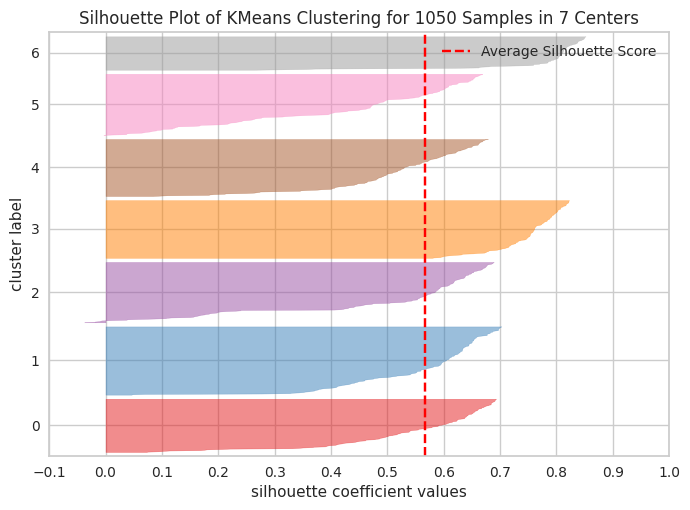

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1050 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [264]:
kmeans = KMeans(n_clusters=7, init="k-means++", random_state=0, n_init="auto")
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(X_embedded)  # Fit the data to the visualizer
visualizer.poof()  # Draw/show/poof the data

In [265]:
df["kmeans_label"] = kmeans.labels_.astype(str)

In [266]:
ari_score = adjusted_rand_score(df["category0"], kmeans.labels_)

In [267]:
print(ari_score)

0.6527944357381641


In [268]:

show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["kmeans_label"],
    title="Projection tSNE de X-PCA (200 composants) avec USE sur cleaned_product_name <br>avec partitionnement Kmeans"
)

In [269]:
show_scatter_graph(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    colors=df["category0"],
    title="Projection tSNE de X-PCA (200 composants) avec USE sur cleaned_product_name <br>avec catégorie de produit"
)

In [270]:
pd.crosstab(df["category0"], df["kmeans_label"])

kmeans_label,0,1,2,3,4,5,6
category0,,,,,,,
baby care,6,30,1,0,3,22,88
beauty and personal care,137,1,0,2,4,5,1
computers,0,0,123,0,25,2,0
home decor & festive needs,0,6,10,3,108,23,0
home furnishing,0,145,0,0,4,1,0
kitchen & dining,0,1,28,0,9,111,1
watches,0,0,0,150,0,0,0


En regardant les classes kmeans_labels majoritaires, on voit les correspondances:

|classe kmeans|classe réelle majoritaire|
|--------------|-------------|
|0|beauty and personal care|
|1|home furnishing|
|2|computers|
|3|watches |
|4|home decor & festive needs|
|5|kitchen & dining|
|6|baby care|

In [274]:
from matplotlib import rc

rc('text', usetex=False)
rc('font', **{'family': 'serif', 'serif': ['cmr10']})


/home/jupyter/.local/lib/python3.8/site-packages/seaborn/matrix.py:456: UserWarning:

cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True

/home/jupyter/.local/lib/python3.8/site-packages/seaborn/matrix.py:316: UserWarning:

cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True



<Axes: ylabel='category0'>

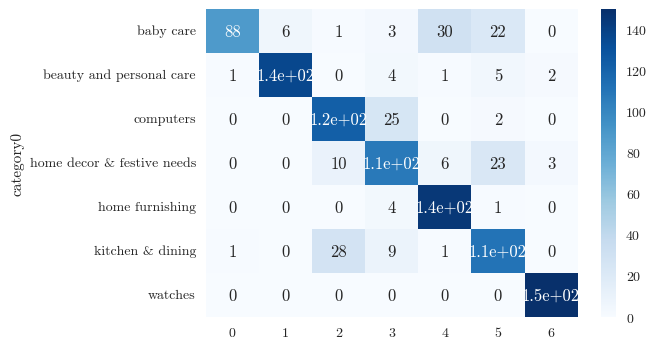

In [275]:
df["category_pred"] = ""

corr_labels = [
    "beauty and personal care",
    "home furnishing",
    "computers",
    "watches",
    "home decor & festive needs",
    "kitchen & dining",
    "baby care",
]

for i in range(0, len(corr_labels)):
    df.loc[df["kmeans_label"]==f"{i}", "category_pred"] = corr_labels[i]


conf_mat = confusion_matrix(df["category0"], df["category_pred"])

df_cm = pd.DataFrame(conf_mat, index = pd.crosstab(df["category0"], df["kmeans_label"]).reset_index()["category0"],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [276]:
print(classification_report(df["category0"], df["category_pred"]))

                            precision    recall  f1-score   support

                 baby care       0.98      0.59      0.73       150
  beauty and personal care       0.96      0.91      0.94       150
                 computers       0.76      0.82      0.79       150
home decor & festive needs       0.71      0.72      0.71       150
           home furnishing       0.79      0.97      0.87       150
          kitchen & dining       0.68      0.74      0.71       150
                   watches       0.97      1.00      0.98       150

                  accuracy                           0.82      1050
                 macro avg       0.83      0.82      0.82      1050
              weighted avg       0.83      0.82      0.82      1050



Avec la classification à partir du plongement USE / cleaned_product_name / PCA-200 + tSNE, nous obtenons des résultats tout à fait acceptables.

L'utilisation de l'algorithme USE auquel on ajouterait une couche de décision est à envisager pour obtenir un classifieur à partir du texte fourni. On peut aussi envisager un classifieur du genre SVM et comparer les résultats.